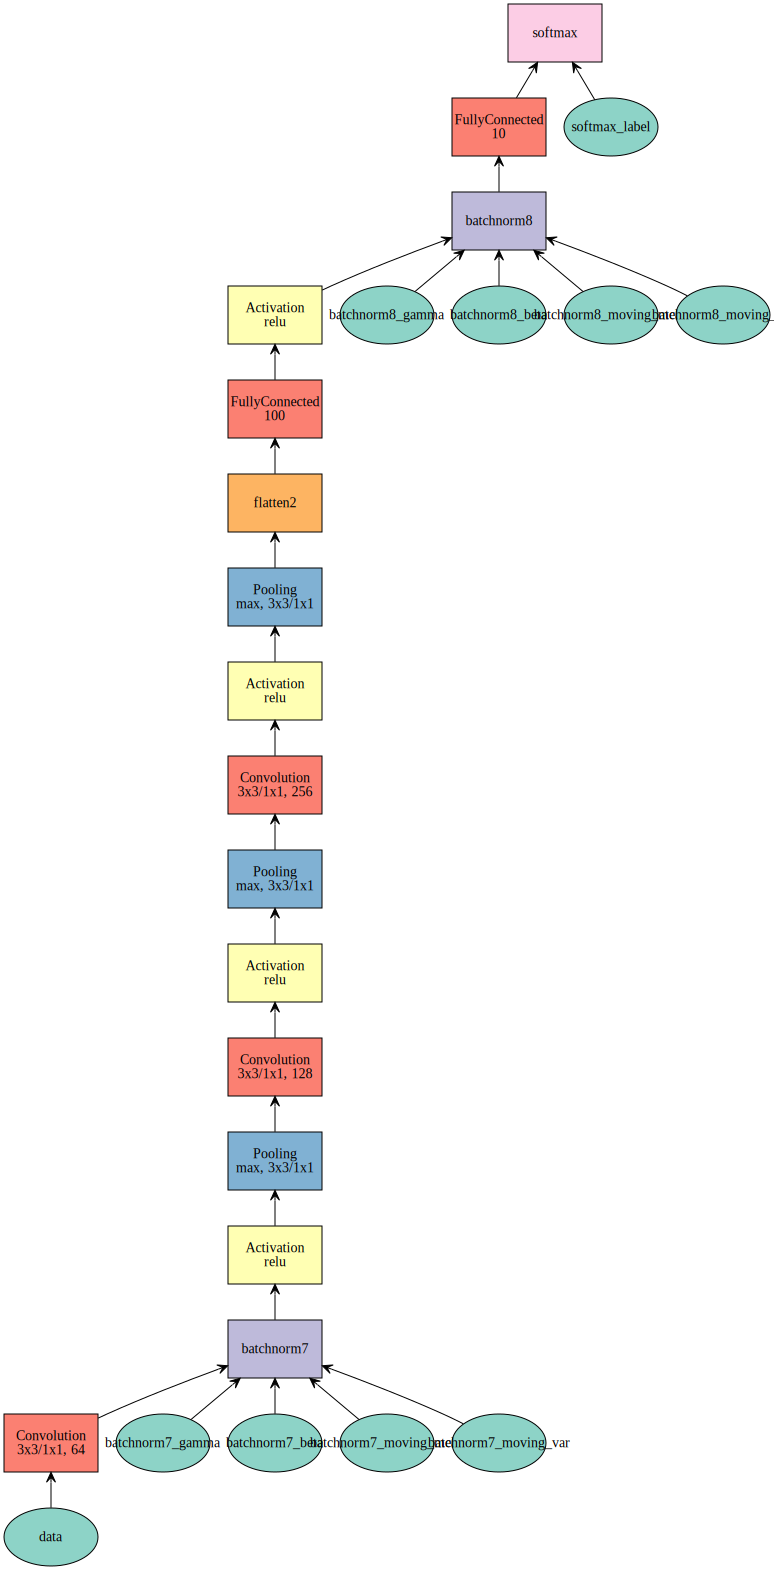

In [7]:
import mxnet as mx

def mlp_layer(input_layer, n_hidden, activation=None, BN=False):

    """
    A MLP layer with activation layer and BN
    :param input_layer: input sym
    :param n_hidden: # of hidden neurons
    :param activation: the activation function
    :return: the symbol as output
    """

    # get a FC layer
    l = mx.sym.FullyConnected(data=input_layer, num_hidden=n_hidden)
    # get activation, it can be relu, sigmoid, tanh, softrelu or none
    if activation is not None:
        l = mx.sym.Activation(data=l, act_type=activation)
    if BN:
        l = mx.sym.BatchNorm(l)
    return l


def conv_layer(input_layer, number_filter = 64, kernel=(3,3), stride=(1,1), pad=(1,1), if_pool=False, BN=False, act=False):
    """
    :return: a single convolution layer symbol
    """
    # todo: Design the simplest convolution layer
    # Find the doc of mx.sym.Convolution by help command
    # Do you need BatchNorm?
    # Do you need pooling?
    # What is the expected output shape?

    layer = mx.sym.Convolution(data=input_layer, num_filter=number_filter, kernel=kernel,
                               stride=stride, pad=pad, no_bias=True)
    if BN:
        layer = mx.sym.BatchNorm(layer)

    if act:
        layer = mx.sym.Activation(data=layer, act_type='relu')

    if if_pool:
        layer = mx.sym.Pooling(data =layer, stride=stride, kernel=kernel, pool_type='max')

    return layer



data = mx.sym.Variable("data")

    # todo: design the CNN architecture
    # How deep the network do you want? like 4 or 5
    # How wide the network do you want? like 32/64/128 kernels per layer
    # How is the convolution like? Normal CNN? Inception Module? VGG like?

layer1 = conv_layer(input_layer=data, number_filter=64, if_pool=True, BN=True, act=True)
layer2 = conv_layer(input_layer=layer1, number_filter=128, if_pool=True, act=True)
layer3 = conv_layer(input_layer=layer2, number_filter=256, if_pool=True, act=True)

data_f = mx.sym.flatten(data=layer3)

# Your Design
l = mlp_layer(input_layer=data_f, n_hidden=100, activation="relu", BN=True)

# MNIST has 10 classes
l = mx.sym.FullyConnected(data=l, num_hidden=10)
# Softmax with cross entropy loss
cnn = mx.sym.SoftmaxOutput(data=l, name='softmax')

mx.viz.plot_network(cnn)